$\textbf{machine-learning algorithms }$ automatically find transformations that turn data into more-useful representations for a given task. Machine-learning algorithms aren’t usually creative in finding these transformations; they’re merely searching through a predefined set of operations, called a $\textbf{hypothesis space}$.
So that’s what machine learning does is, technically: searching for useful representations of some input data, within a predefined space of possibilities, using guidance from a feedback signal. 

$\textbf{From the book Deep learning with python by François Chollet}$

# CLASSIFICATION PROBLEM
 
In the previious section we talked about regression which deals with quatitative target variable answering
questions such as how much? or how many?. Regression problems include predicting the price of a house, the age of students and  the salary of an employee. 


$\textbf{In practice, we are more often interested in making categorical assignments: asking not how much? but which one (boy or girl)?}$. We consider a problem to be a classification problem when dealing with qualitative (categorical) target variable with the aim of assigning an input described by vector x to one of the n discrete categories (class) $C_{i}$  where $i = 1,2 \cdots,n$.


A classifier is a map $f(x) \rightarrow C_{i}$


There are numerous classification methods that can be used to predict categorical outcomes, including logistic regression,
support vector machines (SVM) ,decision trees and neural networks but in this example we will be using a generalization of logistic regression know as  multinomial logistic regression

$\textbf{multinomial logistic regression, also called softmax multinomial logistic regression}$

$\textbf{The multinomial logistic classifier uses a generalization of the sigmoid function called the softmax function}$ to handle multi-class classification problems. where $y_{i}=1, 2,---,N$ with N being the number of classes. It takes N-dimensional vector of arbitrary real values and produces another N-dimensional vector with real values.


Given an input vector $O$, softmax first exponentiates (ensuring non-negativity)  $e^{O_{i}}$, forcing all values to be strictly positive then normalizes it by $\sum_{j}exp(O_{j})$ so that all predicted values for an input sum to $\textbf{1}$. 
Given as input vector the softmax function is defined as

 $$ \hat y_{i} =spftmax(O_{i})= \frac{exp(O_{i})}{\sum_{j}exp(O_{j})}  $$
Where $O=Wx+b$



# NOTE THAT
$\textbf{the bias term is now a vector, with one component for each output node}$

Generally if we are given a minibatch X of examples with dimensionality $d$ and batch size $n$
and and have a target variable with q categories (outputs). Then
the minibatch features $X \in R^{n\times d}$, weights $W \in R^{d\times q}$, and the bias satisfies $b\in R^{q}$

Using a dataset of 3 examples and 4 features $(X \in R^{3 \times 4})$ and with 3 possible output categories, we will need 12 scalars to represent the weights, ($ w \in R^{4 \times 3}$) and 3 scalars to represent the biases ($b \in R^{3}$).
We compute these three logits, $O_{1}, O_{2},$ and $O_{3}$, for each input:


$$O_{1} =w_{11}x_{1} + w_{12}x_{2}+w_{13}x_{3}+w_{14}x_{4} +b_{1}     $$
$$O_{2} =w_{21}x_{1} + w_{22}x_{2}+w_{23}x_{3}+w_{24}x_{4} +b_{2}     $$
$$O_{3} =w_{31}x_{1} + w_{32}x_{2}+w_{33}x_{3}+w_{34}x_{4} +b_{3}     $$

Using softmax function defined above the outputs for the $O_{i}$ will be

$OUTPUT(O_{1})=\frac{\exp(O_{1})}{\exp(O_{1} ) + \exp(O_{2}) +\exp(O_{3})},   OUTPUT(O_{2})=\frac{\exp(O_{2})}{\exp(O_{1} )+\exp(O_{2})   +     \exp(O_{3})},  OUTPUT(O_{3})=\frac{\exp(O_{3})}{\exp(O_{1} )+\exp(O_{2}) +\exp(O_{3})}$


and with the predicted class being the class with the highest probability
  $$predicted \ class=argmax_{i} \hat y(O_{i}) $$
  
  the softmax classifier output values within the range $[0, 1]$. the denominator normalizes the values which causes these class probabilities to sum up to one

importing the needed packages 

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models,layers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# downloading the dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images and train_labels form the training set, and is the data which will be used in training the model in order for the model parameters to learn from the data and find a beter representation of the data. The model will then be tested on the test set (test_images and test_labels) to see how good our model is on newly unseen but similar dataset

In [3]:
train_images.data.ndim

3

# shape of the training input data

In [4]:
train_images.data.shape

(60000, 28, 28)

# shape of the testingin put data

In [5]:
test_images.shape

(10000, 28, 28)

### the labels are an array of digits, ranging from 0 to 9 with each digit representing a class (category)

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### reshaping the data into a shape (m by n) acceptable for our model

In [7]:
train_images=train_images.reshape(60000, 28* 28)
test_images=test_images.reshape(10000, 28* 28)

In [8]:
train_images.shape

(60000, 784)

In [9]:
# uncomment and you will see that the data values is within 0-255
#test_images[3]


### transform the inputs into float32 array  and since the data has values between  0-255 we will divide each value by 255 to have  values between 0 and 1

In [10]:
train_images=train_images.astype('float32') / 255
test_images=test_images.astype('float32') / 255

# Defining our model

In [11]:

network=models.Sequential([
    # model will take as input arrays of shape(*,784) and outpot (*,505)
    # will have 505*785 params
    layers.Dense(505,activation='relu',input_shape=(784,),use_bias=True,bias_initializer='zeros'),
    ## you don't need to specify the size of the input anymore after the first layer
    # This layer automatically inferred its input shape as being the output shape of the layer that came before
    # # will have 506*32 params
    layers.Dense(32,activation='relu'),
    # This layer automatically inferred its input shape as being the output shape of the layer that came before
    ## # will have 33*10 params
    layers.Dense(10,activation='softmax')
    
])


### To train the neural network we
#### A loss function—  defines the feedback signal used for learning (  measures  how well the model predictions match that of the true label)
#### An optimizer—A mechanism to update the model parameters

#### Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified)

In [12]:
 #here 785 where dim 784 + b=1

In [13]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 505)               396425    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                16192     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 412,947
Trainable params: 412,947
Non-trainable params: 0
_________________________________________________________________


In [15]:
505*785

396425

In [2]:
506*32

16192

In [16]:
33*10

330

### since the label is not encoded as categorical data type we need to convert it to categorical data type

In [17]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
train_images.shape

(60000, 784)

In [19]:
x_train,x_vdata,y_train,y_vdata=train_images[30000:], train_images[:30000], train_labels[30000:],train_labels[:30000]

In [20]:
x_vdata.shape,x_train.shape,y_train.shape,y_vdata.shape

((30000, 784), (30000, 784), (30000, 10), (30000, 10))

# training

In [21]:
results=network.fit(x_train,y_train,batch_size=100,validation_data=(x_vdata,y_vdata),epochs=9)

Train on 30000 samples, validate on 30000 samples
Epoch 1/9
30000/30000 [==============================] - 5s 160us/step - loss: 0.3475 - accuracy: 0.8974 - val_loss: 0.2010 - val_accuracy: 0.9410
Epoch 2/9
30000/30000 [==============================] - 5s 155us/step - loss: 0.1371 - accuracy: 0.9587 - val_loss: 0.1320 - val_accuracy: 0.9601
Epoch 3/9
30000/30000 [==============================] - 5s 179us/step - loss: 0.0874 - accuracy: 0.9738 - val_loss: 0.1092 - val_accuracy: 0.9666
Epoch 4/9
30000/30000 [==============================] - 5s 166us/step - loss: 0.0616 - accuracy: 0.9803 - val_loss: 0.1002 - val_accuracy: 0.9705
Epoch 5/9
30000/30000 [==============================] - 5s 171us/step - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.1024 - val_accuracy: 0.9714
Epoch 6/9
30000/30000 [==============================] - 5s 164us/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.1056 - val_accuracy: 0.9714
Epoch 7/9
30000/30000 [==============================] - 5s 159us/st

In [22]:
results=results.history

In [23]:
results.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

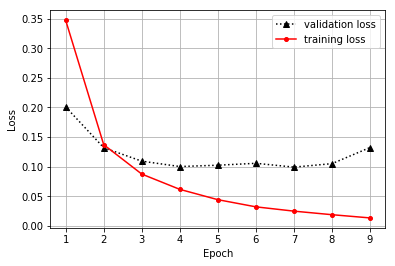

In [24]:
val_loss=results['val_loss']
train_loss=results['loss']
epoch=np.arange(0,9,1)+1
with plt.style.context('seaborn-colorblind'):
    plt.plot(epoch,val_loss,'k^:',markersize=6,label='validation loss')
    plt.plot(epoch,train_loss,'r-o',markersize=4,label='training loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()


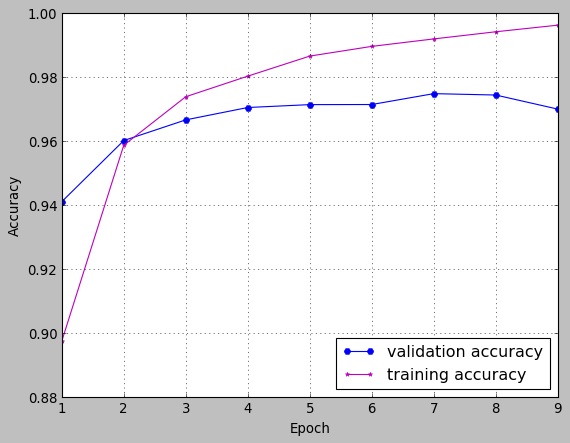

In [25]:
val_acc=results['val_accuracy']
train_acc=results['accuracy']
epoch=np.arange(0,9,1)+1
with plt.style.context('_classic_test'):
    plt.plot(epoch,val_acc,'H-',markersize=6,label='validation accuracy')
    plt.plot(epoch,train_acc,'m-*',markersize=4,label='training accuracy')
    plt.legend(loc='lower right')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()


# evaluating our model on the test data

In [26]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 81us/step


In [27]:
print(test_acc)

0.9700999855995178
